# Linear Regression Part (A)
## Getting the Dataset

In [111]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "./"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])
drink_Data.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


## Simple Linear Regression

Creating a new dataset for holding onto the columns needed for Simple Linear Regression. In the new dataset we made, it has a new column called 'Combine_Servings' that takes the total amount of beer, spirit, and wine serverings.

In [112]:
import pandas as pd

drink_Data.head()

new_drink_Data = drink_Data[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']]

new_drink_Data['Combine_Servings'] = new_drink_Data['beer_servings'] + new_drink_Data['spirit_servings'] + new_drink_Data['wine_servings']

new_drink_Data.head()

C:\Users\sho85\AppData\Local\Temp\ipykernel_22324\1845018562.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_drink_Data['Combine_Servings'] = new_drink_Data['beer_servings'] + new_drink_Data['spirit_servings'] + new_drink_Data['wine_servings']


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Combine_Servings
0,0,0,0,0.0,0
1,89,132,54,4.9,275
2,25,0,14,0.7,39
3,245,138,312,12.4,695
4,217,57,45,5.9,319


### Preparing our train/test
Here, we create an x and y varaible that looks at the independent variable, Combine_Servings, and the dependent variable, Total_Litres_of_Pure_Alcohol. We then use the train_test_split method to split of our data into 2 different types, one for training and one for testing. We made the test size take 25% of the data and stored it to a random seed on 1.

In [113]:
x = new_drink_Data.iloc[:, 4].values  #independent variable arrays, Combine_Servings
y = new_drink_Data.iloc[:, 3].values  #dependent variable arrays, Total_Litres_Of_Pure_Alcohol

In [114]:
# Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=1)

The code snippet below is to reshape the training and testing of the independent variable into a 2-dimensional arrays for plotting purposes

In [115]:
# Making the training and testing 2 Dimensional arrays
x_train = np.array(x_train).reshape(-1, 1)
x_train

array([[274],
       [571],
       [385],
       [275],
       [  6],
       [583],
       [ 86],
       [328],
       [  6],
       [643],
       [404],
       [ 51],
       [ 55],
       [111],
       [123],
       [219],
       [106],
       [ 28],
       [553],
       [  0],
       [112],
       [  0],
       [  6],
       [234],
       [431],
       [369],
       [ 57],
       [  0],
       [ 49],
       [ 57],
       [665],
       [ 56],
       [279],
       [605],
       [488],
       [  0],
       [559],
       [  0],
       [  6],
       [640],
       [ 56],
       [634],
       [257],
       [134],
       [156],
       [ 39],
       [ 11],
       [295],
       [134],
       [439],
       [ 17],
       [  0],
       [233],
       [123],
       [638],
       [325],
       [380],
       [ 82],
       [529],
       [  0],
       [504],
       [169],
       [185],
       [ 83],
       [ 17],
       [382],
       [600],
       [122],
       [370],
       [ 72],
       [ 17],
      

In [116]:
x_test = np.array(x_test).reshape(-1, 1)
x_test

array([[459],
       [124],
       [ 21],
       [426],
       [ 43],
       [349],
       [197],
       [596],
       [130],
       [ 54],
       [ 62],
       [ 39],
       [216],
       [591],
       [147],
       [463],
       [ 45],
       [349],
       [152],
       [ 80],
       [ 36],
       [319],
       [  0],
       [436],
       [ 18],
       [  0],
       [ 30],
       [141],
       [ 11],
       [407],
       [ 44],
       [ 11],
       [ 23],
       [188],
       [ 50],
       [352],
       [328],
       [ 23],
       [398],
       [  0],
       [273],
       [360],
       [165],
       [541],
       [ 20],
       [  6],
       [120],
       [113],
       [565]], dtype=int64)

### Fitting
Here, we fit the training variables and display the intercept and slope of the line once fitted.

In [117]:
# Fitting
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [118]:
intercept = regressor.intercept_
intercept

0.5227534772978712

In [119]:
slope = regressor.coef_
slope

array([0.01733409])

### Predicting
In this section, we use the predict method to predict the outcome of x_train and x_test and store it into a variable used for plotting to see how close our model is to the actual data

In [120]:
# Predicting; y_pred are the predicted results of the Combine_Servings
y_pred_train = regressor.predict(x_train)
y_pred_train

array([ 5.27229528, 10.42052124,  7.19637973,  5.28962937,  0.62675804,
       10.62853037,  2.01348557,  6.20833636,  0.62675804, 11.66857602,
        7.52572752,  1.40679228,  1.47612866,  2.44683793,  2.65484706,
        4.3189201 ,  2.36016746,  1.00810811, 10.10850755,  0.52275348,
        2.46417202,  0.52275348,  0.62675804,  4.57893151,  7.99374806,
        6.91903422,  1.51079684,  0.52275348,  1.37212409,  1.51079684,
       12.04992609,  1.49346275,  5.35896575, 11.00988044,  8.98179143,
        0.52275348, 10.21251211,  0.52275348,  0.62675804, 11.61657374,
        1.49346275, 11.51256917,  4.97761568,  2.84552209,  3.22687217,
        1.19878315,  0.71342851,  5.63631125,  2.84552209,  8.13242081,
        0.81743308,  0.52275348,  4.56159742,  2.65484706, 11.58190555,
        6.15633408,  7.10970926,  1.9441492 ,  9.69248929,  0.52275348,
        9.25913693,  3.45221539,  3.7295609 ,  1.96148329,  0.81743308,
        7.14437745, 10.92320997,  2.63751296,  6.93636832,  1.77

Plotting the training data first and including the predicted train set on y (red line)

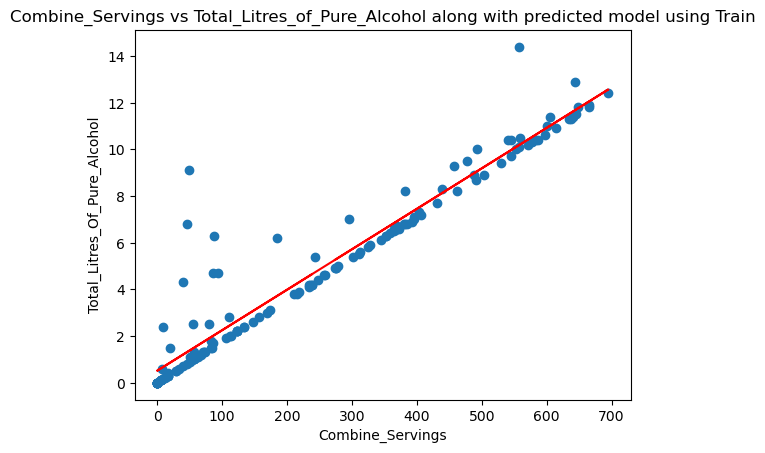

In [121]:
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train) # plotting the observation line
plt.plot(x_train, y_pred_train, color='red') # plotting the observation line but using the predicted dependent variable

plt.title("Combine_Servings vs Total_Litres_of_Pure_Alcohol along with predicted model using Train") # stating the title of the graph
 
plt.xlabel("Combine_Servings") # adding the name of x-axis
plt.ylabel("Total_Litres_Of_Pure_Alcohol") # adding the name of y-axis
plt.show() # specifies end of graph

Predicting using the testing dataset now

In [122]:
y_pred_test = regressor.predict(x_test)
y_pred_test

array([ 8.4791027 ,  2.67218115,  0.88676945,  7.90707759,  1.26811953,
        6.57235234,  3.93757003, 10.8538736 ,  2.77618572,  1.45879456,
        1.59746732,  1.19878315,  4.26691782, 10.76720313,  3.07086532,
        8.54843907,  1.30278771,  6.57235234,  3.15753579,  1.90948101,
        1.14678087,  6.05232951,  0.52275348,  8.08041853,  0.83476717,
        0.52275348,  1.0427763 ,  2.96686075,  0.71342851,  7.5777298 ,
        1.28545362,  0.71342851,  0.92143764,  3.78156318,  1.38945819,
        6.62435462,  6.20833636,  0.92143764,  7.42172295,  0.52275348,
        5.25496118,  6.76302737,  3.38287901,  9.90049842,  0.86943536,
        0.62675804,  2.60284478,  2.48150612, 10.31651668])

Plotting the testing data and observing how closely it resembles our train data.

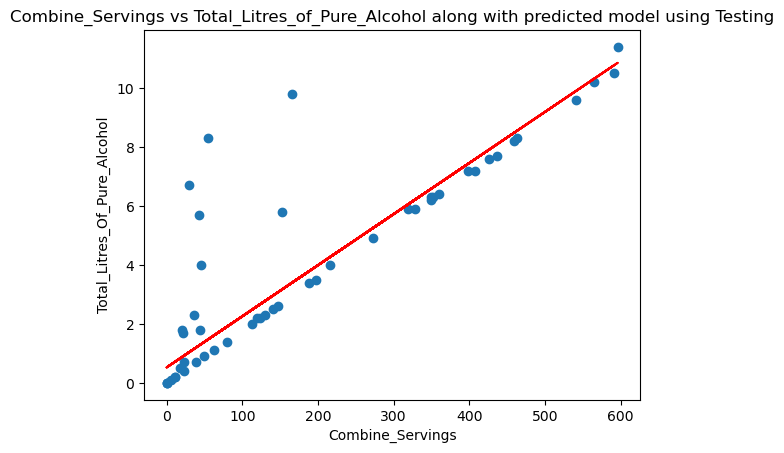

In [123]:
#plot for the TRAIN
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test) # plotting the observation line
plt.plot(x_test, y_pred_test, color='red') # plotting the observation line

plt.title("Combine_Servings vs Total_Litres_of_Pure_Alcohol along with predicted model using Testing") # stating the title of the graph
 
plt.xlabel("Combine_Servings") # adding the name of x-axis
plt.ylabel("Total_Litres_Of_Pure_Alcohol") # adding the name of y-axis
plt.show() # specifies end of graph

### Finding the mean squarred error and the R-squared on both the testing and training models.
Mean Squared Error: how much the residuals vary around the fitted lines <br>
R-Squared: Correlation between x and y; ranges from 0 to 1; higher the number the better the model

In [124]:
# Model evaluation
print("Root mean squared error on testing = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared on testing= %.4f' % r2_score(y_test, y_pred_test))

print("Root mean squared error on training = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R-squared on training = %.4f' % r2_score(y_train, y_pred_train))

Root mean squared error on testing = 1.8266
R-squared on testing= 0.6981
Root mean squared error on training = 1.1405
R-squared on training = 0.9140


## Multiple Linear Regression
Using the same dataset, drinks.csv, we used all three servings columns, beer, spirit, and wine, as independent variables and have the dependent variable be the Total_litres_of_Pure_Alcohol. We then split the data into training and testing varaibles, saving only 25% for testing.

In [125]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

path = "./"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])

x_train, x_test, y_train, y_test = train_test_split(
  drink_Data[['beer_servings', 'spirit_servings', 'wine_servings']], 
  drink_Data['total_litres_of_pure_alcohol'], 
  test_size=0.25,
  random_state=0)
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)

print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (144, 3)
y_train shape:  (144,)
x_test shape:  (49, 3)
y_test shape:  (49,)


### Fitting the training models
Here, we fit the training model and display the y-intercept and slope

In [126]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(x_train, y_train)

LinearRegression()

In [127]:
intercept = regr.intercept_
intercept

0.6137880966226286

In [128]:
slope = regr.coef_
slope

array([0.01803339, 0.0163801 , 0.01632606])

Predicting the training data first

In [129]:
# Apply model to the test set
y_pred_train = regr.predict(x_train)
y_pred_train

array([ 7.99262056,  0.7743813 ,  9.11875129,  2.00813573,  3.49599407,
        1.02855614,  0.97099653,  1.48574322,  2.71440351,  1.82016526,
       10.77069164,  6.64904208,  5.2288066 ,  6.6414857 ,  5.98246162,
       10.01637971,  6.70386638,  3.73996358,  3.54747923,  1.9091526 ,
        0.89555637,  6.61405857,  2.20072668, 10.23148858,  2.84473247,
        0.6137881 ,  2.66458098,  6.10121268,  9.43986262,  1.29318773,
        2.59198889,  0.6137881 ,  3.18271273,  4.61659755,  1.82760421,
        0.6137881 ,  5.98805994,  2.84962142,  2.12807127,  7.39436826,
        0.72198845,  8.30589608,  4.68716223,  6.85266449,  6.66071046,
        0.6137881 ,  2.38146922,  0.95456239,  2.56754921,  5.62211709,
       10.74426661,  4.90541894,  2.7324369 ,  1.65399154, 10.51870026,
        5.57235636,  0.6137881 ,  6.57738386,  7.66830072,  8.94542321,
        7.53945195,  4.42755727,  9.9700014 ,  0.72033516,  0.73666122,
        4.79630329,  1.39366204,  7.08818724, 12.38615314,  0.72

Plotting the training and predicted variables of the dependent values and showing the root mean squarred error and R-squarred score

Root mean squared error = 1.2451
R-squared = 0.8905


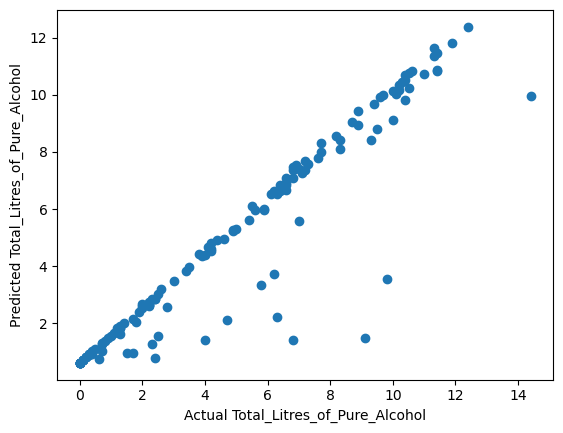

In [130]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('R-squared = %.4f' % r2_score(y_train, y_pred_train))

plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Total_Litres_of_Pure_Alcohol")
plt.ylabel("Predicted Total_Litres_of_Pure_Alcohol")
plt.show()

Using the testing data now to apply multiple linear regression

In [131]:
y_pred_test = regr.predict(x_test)

Root mean squared error = 1.5794
R-squared = 0.8184


Text(0, 0.5, 'Predicted Litres_of_Pure_Alcohol')

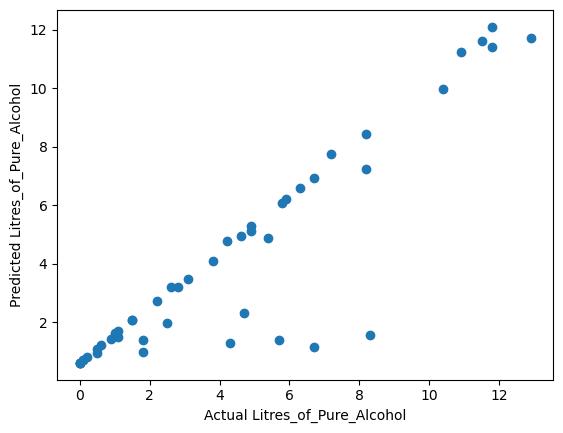

In [132]:
# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Litres_of_Pure_Alcohol")
plt.ylabel("Predicted Litres_of_Pure_Alcohol")